In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

# Reading Dataset

In [2]:
data=pd.read_csv("datahealth.csv")

In [3]:
df=data.copy()
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


After data cleansing, transformation and EDA the modelling is performed. Classification modeling techniques are used 
considering the nature of target variable:


# Feature Selection and Modeling:

In [43]:
df2=encoded_data.drop(['Ptid','Dexa_Freq_During_Rx','Ntm_Speciality','Risk_Segment_Prior_Ntm'],axis=1)

In [44]:
df2.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
0,1,1,2,1,4,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1
1,0,1,1,1,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1
2,0,0,3,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,2.0,1
3,0,0,2,1,0,3,0,1,0,1,...,0,0,0,0,0,0,0,0,1.0,1
4,0,0,2,1,0,3,0,1,1,1,...,0,0,0,0,0,0,0,0,1.0,1


In [45]:
X = df2.drop(['Persistency_Flag'], axis=1)
Y = df2['Persistency_Flag']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2396, 65) (2396,)
(1028, 65) (1028,)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr_model = LogisticRegression(random_state=25)

In [50]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred = lr_model.predict(xtest)

In [52]:
pred[0:9]

array([0, 0, 1, 1, 0, 0, 1, 1, 0])

In [53]:
pred_prb = lr_model.predict_proba(xtest)

In [54]:
pred_prb[0:9, 0:9]

array([[0.66683199, 0.33316801],
       [0.91720807, 0.08279193],
       [0.2707736 , 0.7292264 ],
       [0.14434199, 0.85565801],
       [0.89952861, 0.10047139],
       [0.60013178, 0.39986822],
       [0.37384119, 0.62615881],
       [0.19115354, 0.80884646],
       [0.93518268, 0.06481732]])

In [55]:
lr_pred_prb = lr_model.predict_proba(xtest)[:, 1]

In [56]:
xtest.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
1213,1,2,1,3,3,0,1,1,1,0,...,0,0,0,0,0,0,0,0,2.0,4
3283,0,2,1,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2.0,4
1087,0,2,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0.0,2
1235,0,2,1,3,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0
2849,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1


In [57]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,...,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat,pred,pred_probability,actual
1213,1,2,1,3,3,0,1,1,1,0,...,0,0,0,0,0,2.0,4,0,0.333168,1
3283,0,2,1,3,3,0,1,0,0,0,...,0,0,0,0,1,2.0,4,0,0.082792,0
1087,0,2,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0.0,2,1,0.729226,0
1235,0,2,1,3,2,1,0,0,1,0,...,0,0,0,0,0,0.0,0,1,0.855658,1
2849,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0.0,1,0,0.100471,0


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(ytest, pred)

array([[564,  67],
       [134, 263]], dtype=int64)

In [60]:
confusion_matrix(ytest, pred).ravel()

array([564,  67, 134, 263], dtype=int64)

In [61]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Persistent": [tp, fp], "pred_Non-Persistent": [
                           fn, tn]}, index=["Persistent", "Not Persistent"])
conf_matrix

,pred_Persistent,pred_Non-Persistent
Persistent,263,134
Not Persistent,67,564


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [63]:
precision_lr = precision_score(ytest, pred)
print("Precision by built-in function: {}".format(precision_lr))
recall_lr = recall_score(ytest, pred)
print("Recall by built-in function: {}".format(recall_lr))
accuracy_lr = accuracy_score(ytest, pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))
f1_lr = f1_score(ytest, pred)
print("F1 Score by built-in function: {}".format(f1_lr))

Precision by built-in function: 0.796969696969697
Recall by built-in function: 0.6624685138539043
Accuracy by built-in function: 0.8044747081712063
F1 Score by built-in function: 0.7235213204951858


In [64]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [65]:
tpr, fpr

(0.6624685138539043, 0.10618066561014262)

In [66]:
fpr = 1 - recall_lr
tpr, fpr

(0.6624685138539043, 0.33753148614609574)

In [67]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [68]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [69]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_prb)

In [70]:
auc_lr = roc_auc_score(ytest, lr_pred_prb)
auc_lr

0.8785463080871991

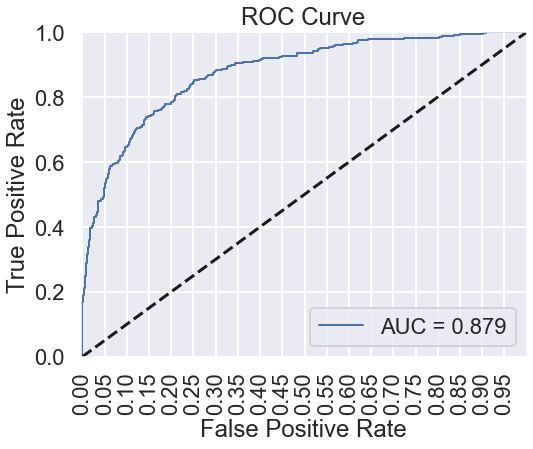

In [71]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_lr)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
clf_dt = DecisionTreeClassifier(
    max_depth=3, criterion='gini', random_state=100)

In [74]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [75]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:, 1]

In [76]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt=precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))
dt_f1=f1_score(ytest,dt_pred)
print("F1 Score: {}".format(dt_f1))

Accuracy: 0.7655642023346303
Precision: 0.8095238095238095
Recall: 0.5138539042821159
F1 Score: 0.6286594761171033


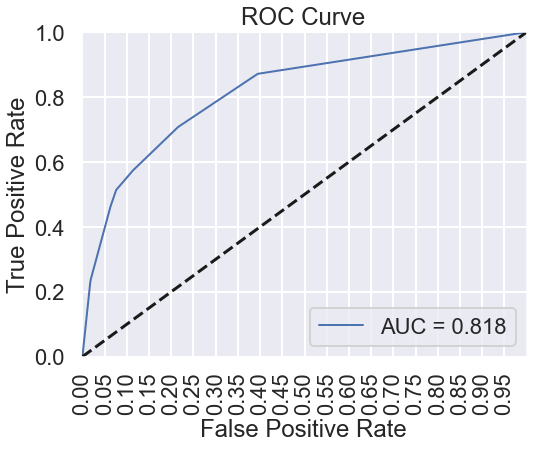

In [77]:
sns.set_context('poster')
auc_dt = roc_auc_score(ytest, dt_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
clf_rf = RandomForestClassifier(random_state=100)

In [80]:
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [81]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

In [82]:
precision_rf=precision_score(ytest,rf_pred)
print("Precision: {}".format(precision_rf))
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))
recall_rf = recall_score(ytest,rf_pred)
print("Recall: {}".format(recall_rf))
rf_f1=f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1))

Precision: 0.7669902912621359
Accuracy: 0.77431906614786
Recall: 0.5969773299748111
F1 Score: 0.6713881019830029


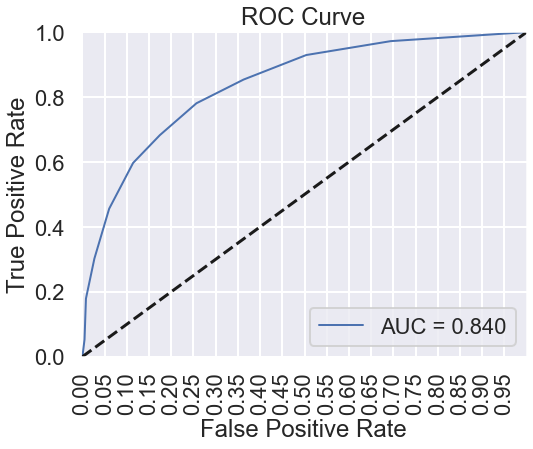

In [83]:
auc_rf = roc_auc_score(ytest, rf_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_rf)

In [84]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [85]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [86]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

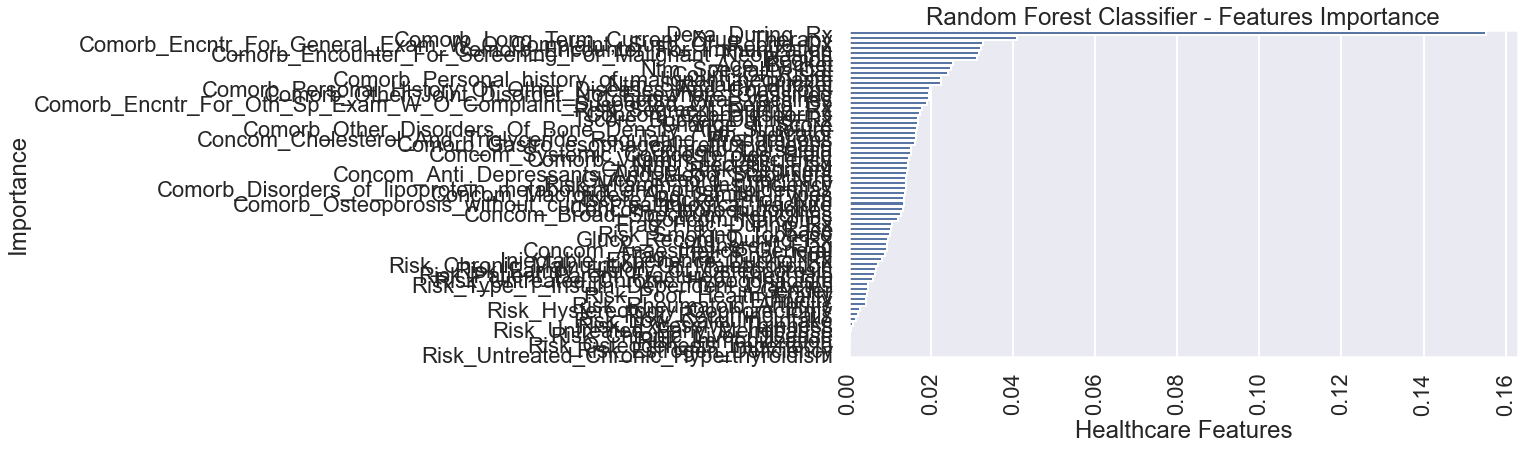

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(y="Feature Names", x="Importance", data=feature_imp, color='b')
plt.xlabel("Healthcare Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [90]:
pred_clf_adb = clf_adb.predict(xtest)

In [91]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

In [92]:
accuracy_adb=accuracy_score(ytest,pred_clf_adb)
print("Accuracy: {}".format(accuracy_adb))
precision_adb=precision_score(ytest, pred_clf_adb)
print("Precision: {}".format(precision_adb))
recall_adb=recall_score(ytest,pred_clf_adb)
print("Recall_score: {}".format(recall_adb))
f1_adb=f1_score(ytest, pred_clf_adb)
print("F1 score: {}".format(f1_adb))

Accuracy: 0.8073929961089494
Precision: 0.7970149253731343
Recall_score: 0.672544080604534
F1 score: 0.7295081967213114


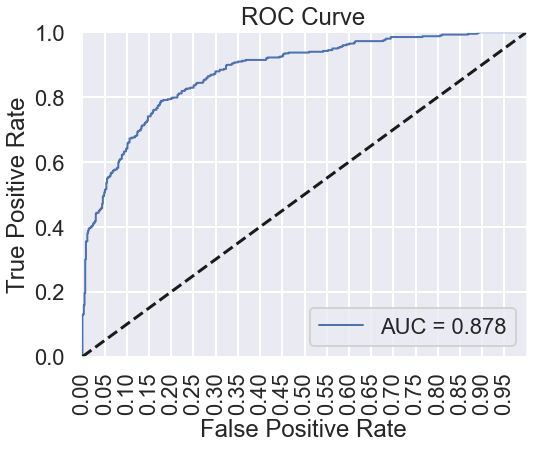

In [93]:
auc_adb = roc_auc_score(ytest, adb_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, adb_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_adb)

In [94]:
import xgboost as xgb

In [95]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [96]:
clf_xgb.fit(xtrain, ytrain)

[17:16:55] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [97]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

In [98]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))
recall_xgb = recall_score(ytest,xgb_pred)
print("Recall: {}".format(recall_xgb))
precision_xgb = precision_score(ytest,xgb_pred)
print("Precision: {}".format(precision_xgb))
f1_xgb=f1_score(ytest, xgb_pred)
print("F1 score: {}".format(f1_xgb))


Accuracy: 0.7889105058365758
Recall: 0.6851385390428212
Precision: 0.7472527472527473
F1 score: 0.7148488830486203


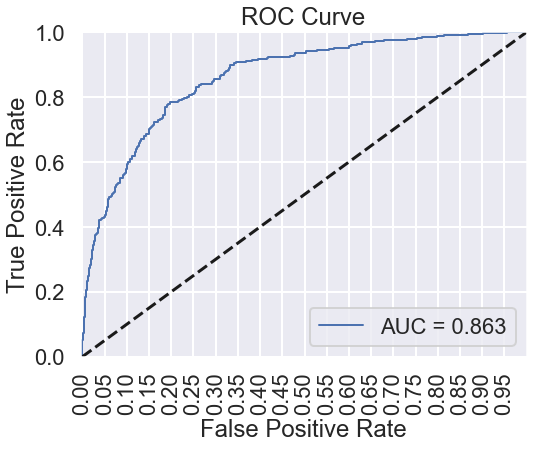

In [99]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

In [100]:
comparison_dict={"Algorithm":["Logistic Regression","Decision Tree","Random Forest","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xgb,accuracy_adb],
                 "Precision":[precision_lr,precision_dt,precision_rf,precision_xgb,precision_adb],
                 "Recall":[recall_lr,recall_dt,recall_rf,recall_xgb,recall_adb],
                 "AUC":[auc_lr,auc_dt,auc_rf,auc_xgb,auc_adb],
                 "F1 Score":[f1_lr,dt_f1,rf_f1,f1_xgb,f1_adb]
                }

In [101]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'AUC'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
3,XGBoost,0.788911,0.747253,0.685139,0.862814,0.714849
4,Ada Boost,0.807393,0.797015,0.672544,0.878153,0.729508
0,Logistic Regression,0.804475,0.796970,0.662469,0.878546,0.723521
2,Random Forest,0.774319,0.766990,0.596977,0.839901,0.671388
1,Decision Tree,0.765564,0.809524,0.513854,0.817766,0.628659
